In [1]:
import pandas as pd
# import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from plotting_tempelate import plot_scaling_lines
import ast

In [2]:
# Load data files into a big dictioanry
raw_data = {}
# methods = []
for file in os.listdir("."):
    if file.endswith('.csv'):
        name = '_'.join((file.split('.')[0]).split('_')[2:])
        # print(name)
        raw_data[name] = pd.read_csv(os.path.join(file))
        # methods.append(name)

# methods.sort(reverse=True)
# print(methods)
methods = ['OPT', 'MP_ASP', 'MP_APST4', 'IT_1+6', 'IT_2+6', 'IT_3+6', 'IT_4+6']
# methods = ['ECMP_ASP', 'ECMP_APST4',e 'OPT', 'MP_ASP', 'MP_APST4', 'IT_1+6', 'IT_2+6', 'IT_3+6', 'IT_4+6'] # TODO

In [3]:
# the key of each file:
# OPT: V,D,traffic_pattern,Lremote_MAX_ECMP_ASP,Llocal_MAX_ECMP_ASP,Phi_ECMP_ASP[Gbps],
        #Lremote_NEXU_OPT,Phi_NEXU[Gbps],init_time[s],solving_time[s],peak_RAM[MB]

# MP: V,D,traffic_pattern,Lremote_MAX_ECMP_ASP,Llocal_MAX_ECMP_ASP,Phi_ECMP_ASP[Gbps],
        #Lremote_NEXU_MP_ASP,Phi_NEXU[Gbps],init_time[s],solving_time[s],peak_RAM[MB]

# IT: V,D,traffic_pattern,Lremote_MAX_ECMP_ASP,Llocal_MAX_ECMP_ASP,Phi_ECMP_ASP[Gbps],
        #Lremote_NEXU_IT,Phi_NEXU[Gbps],method1_times[s],method1_peak_RAMs[MB],method1_results[Gbps],method2_time[s],method2_attempts,method2_peak_RAM[MB]


In [4]:
max_of_list = lambda x: max(ast.literal_eval(x))
# calculate time for each method:
raw_data['OPT']['_time'] = raw_data['OPT']['peak_RAM[MB]'] 
raw_data['MP_ASP']['_time'] = raw_data['MP_ASP']['peak_RAM[MB]'] 
raw_data['MP_APST4']['_time'] = raw_data['MP_APST4']['peak_RAM[MB]'] 
raw_data['IT_1+6']['_time'] = raw_data['IT_1+6'].apply(lambda row: max(row['method2_peak_RAM[MB]'], max_of_list(row['method1_peak_RAMs[MB]'])), axis=1)
raw_data['IT_2+6']['_time'] = raw_data['IT_2+6'].apply(lambda row: max(row['method2_peak_RAM[MB]'], max_of_list(row['method1_peak_RAMs[MB]'])), axis=1)
raw_data['IT_3+6']['_time'] = raw_data['IT_3+6'].apply(lambda row: max(row['method2_peak_RAM[MB]'], max_of_list(row['method1_peak_RAMs[MB]'])), axis=1)
raw_data['IT_4+6']['_time'] = raw_data['IT_4+6'].apply(lambda row: max(row['method2_peak_RAM[MB]'], max_of_list(row['method1_peak_RAMs[MB]'])), axis=1)

In [5]:
def plot_for_traffic(traffic_pattern, _methods, _x_power:int = 1):
    _V = [ 16,  25,  36,  49,  64,  81, 100]
    plot_data={method: [] for method in _methods}
    for method in _methods:
        for v in _V:
            _values = raw_data[method][(raw_data[method]['V']==v) & (raw_data[method]['traffic_pattern']==traffic_pattern)]['_time'].values
            if len(_values):
                plot_data[method].append( _values[0] )
    plot_scaling_lines(_V, plot_data, "scaling of Nexullance methods", f"V^{_x_power}", "peak RAM (MB)", False, _x_power)
    print(plot_data)

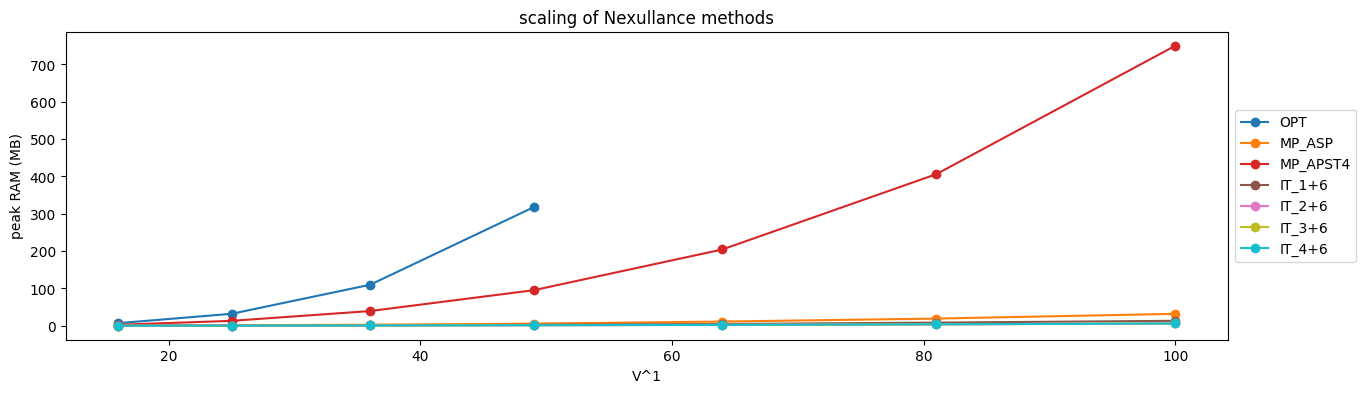

{'OPT': [7.083447, 32.11602, 109.871178, 317.743122], 'MP_ASP': [0.25759, 1.343784, 2.931296, 5.703787, 11.317939, 19.283467, 31.978163], 'MP_APST4': [2.706431, 13.243865, 39.449501, 95.241813, 204.434197, 406.098357, 750.220401], 'IT_1+6': [0.204495, 0.598796, 1.245576, 2.553808, 4.785824, 8.477564, 13.301064], 'IT_2+6': [0.143592, 0.37244, 0.745728, 1.476104, 2.433912, 3.88676, 6.118768], 'IT_3+6': [0.144832, 0.373044, 0.747528, 1.477148, 2.43724, 3.886608, 6.12314], 'IT_4+6': [0.143531, 0.372344, 0.74768, 1.481984, 2.434756, 3.887688, 6.114884]}


In [6]:
plot_for_traffic("uniform", methods)

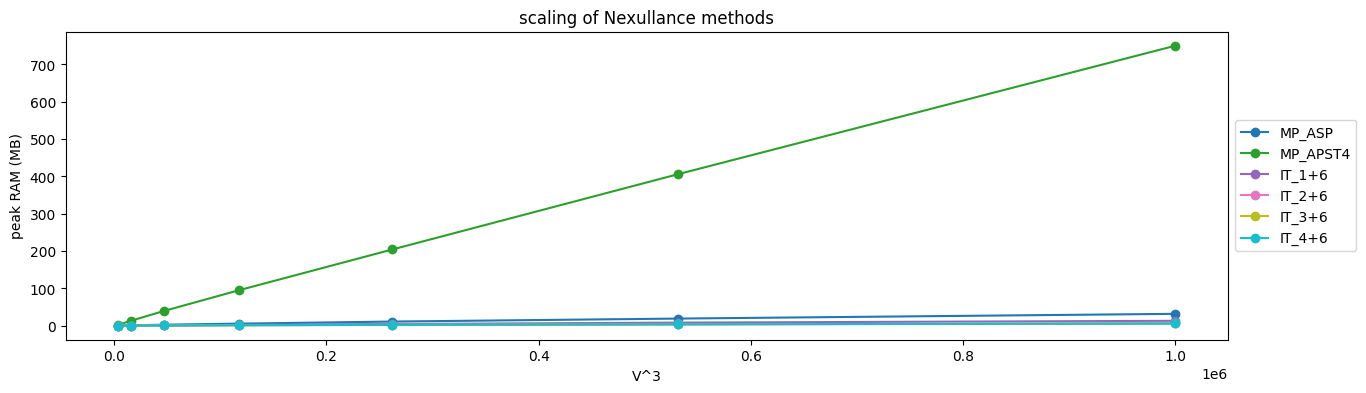

{'MP_ASP': [0.25759, 1.343784, 2.931296, 5.703787, 11.317939, 19.283467, 31.978163], 'MP_APST4': [2.706431, 13.243865, 39.449501, 95.241813, 204.434197, 406.098357, 750.220401], 'IT_1+6': [0.204495, 0.598796, 1.245576, 2.553808, 4.785824, 8.477564, 13.301064], 'IT_2+6': [0.143592, 0.37244, 0.745728, 1.476104, 2.433912, 3.88676, 6.118768], 'IT_3+6': [0.144832, 0.373044, 0.747528, 1.477148, 2.43724, 3.886608, 6.12314], 'IT_4+6': [0.143531, 0.372344, 0.74768, 1.481984, 2.434756, 3.887688, 6.114884]}


In [7]:
methods_IT = [x for x in methods if x != 'OPT']
plot_for_traffic("uniform", methods_IT, 3)

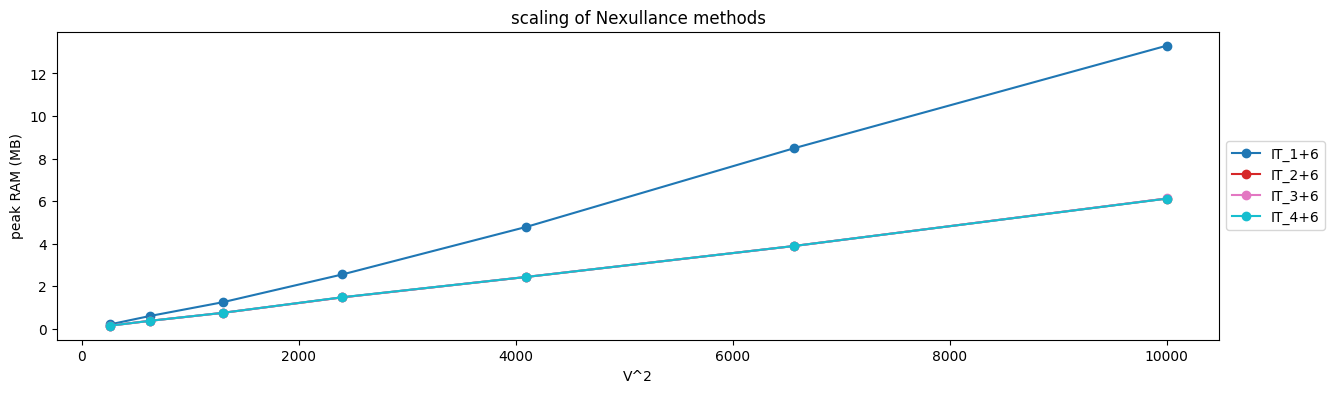

{'IT_1+6': [0.204495, 0.598796, 1.245576, 2.553808, 4.785824, 8.477564, 13.301064], 'IT_2+6': [0.143592, 0.37244, 0.745728, 1.476104, 2.433912, 3.88676, 6.118768], 'IT_3+6': [0.144832, 0.373044, 0.747528, 1.477148, 2.43724, 3.886608, 6.12314], 'IT_4+6': [0.143531, 0.372344, 0.74768, 1.481984, 2.434756, 3.887688, 6.114884]}


In [8]:
methods_IT = [x for x in methods if x not in ['OPT', 'MP_APST4', 'MP_ASP']]
plot_for_traffic("uniform", methods_IT,2)